## ImageDataGenerator를 활용한 Tensorflow 제공 Malaria set 분류
* 오염된 세포와 정상세포를 분류하는 이미지 데이터 분석
* train set의 이미지 샘플이 너무 적을 때 유사한 이미지를 대량 생성해 학습을 더 하기

In [1]:
import os
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator  # keras의 ImageDataGenerator 

In [3]:
data_dir = 'D:\\cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

### 데이터 경로 지정

In [14]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [15]:
test_path

'D:\\cell_images\\test\\'

In [16]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
par_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [21]:
par_cell

'D:\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [22]:
imread(par_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

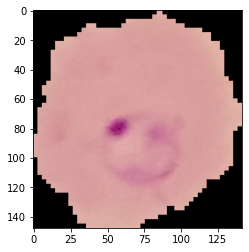

In [23]:
plt.imshow(imread(par_cell))

In [24]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [25]:
uni_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [26]:
imread(uni_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

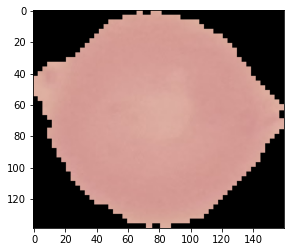

In [27]:
plt.imshow(imread(uni_cell))

In [ ]:
help(ImageDataGenerator)

In [28]:
image_gen = ImageDataGenerator(rotation_range = 20, 
                               width_shift_range =0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest')                               

정규화 확인(or rescale=/255)

In [29]:
imread(par_cell).max()

0.9098039

In [30]:
imread(par_cell).min()

0.0

In [31]:
par_img = imread(par_cell)

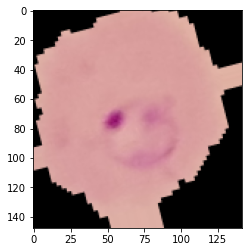

In [33]:
plt.imshow(image_gen.random_transform(par_img))

In [34]:
train_path

'D:\\cell_images\\train\\'

In [35]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [36]:
os.listdir(train_path)

['parasitized', 'uninfected']

### CNN input을 위한 이미지 리사이징 정보 얻기
    * 평균보다 작은 이미지가 많으면 추가적인 패딩을 할 수도 있고, 큰 이미지가 많으면 자르거나 압축


In [37]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "uninfected"):
    img = imread(test_path + "uninfected\\" + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


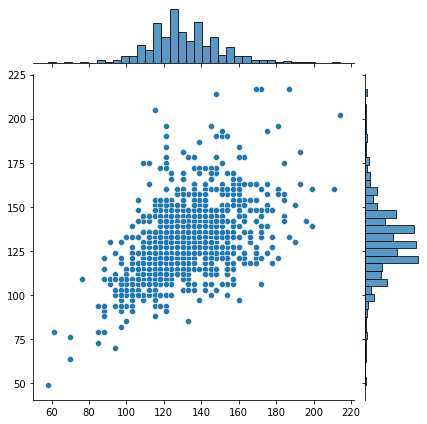

In [40]:
sns.jointplot(dim1, dim2)

In [30]:
np.mean(dim1)

130.92538461538462

In [31]:
np.mean(dim2)

130.75

In [13]:
image_shape = (130,130,3)  # 평균값 참조

### 신경망 만들기 - 합성곱층과 MaxPooling의 반복

In [41]:
from tensorflow import keras
from keras import layers

In [42]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten

In [50]:
intro = keras.Input(shape=(image_shape))
c1 = layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu')(intro)
m1 = layers.MaxPooling2D(pool_size=(2,2))(c1)
c2 = layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu')(m1)
m2 = layers.MaxPooling2D(pool_size=(2,2))(c2)
c3 = layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu')(m2)
m3 = layers.MaxPooling2D(pool_size=(2,2))(c3)
f1 = layers.Flatten()(m3)
d1 = layers.Dense(128, activation = 'relu')(f1)
dr1 = layers.Dropout(0.5)(d1)
outro = layers.Dense(1, activation = 'sigmoid')(dr1)


In [51]:
model = keras.Model(inputs = intro, 
                    outputs = outro)

model.compile(loss= 'binary_crossentropy', 
                    optimizer = 'adam', 
                    metrics = ['accuracy'])

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 130, 130, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        3692

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [55]:
batch_size = 16

In [56]:
image_shape[:3]

(130, 130, 3)

### image_shape size를 기반으로 train과 test 이미지 생성

In [57]:
train_img_gen = image_gen.flow_from_directory(train_path, 
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [58]:
test_img_gen = image_gen.flow_from_directory(test_path, 
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary',
                                                shuffle = False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

### 모델 학습

In [60]:
results = model.fit_generator(train_img_gen, epochs=20,
                              validation_data = test_img_gen,
                              callbacks=[early_stop])

C:\Users\user\AppData\Local\Temp/ipykernel_3504/2262677257.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_img_gen, epochs=20,


Epoch 1/20
1560/1560 [==============================] - 415s 261ms/step - loss: 0.9168 - accuracy: 0.5475 - val_loss: 0.6816 - val_accuracy: 0.5662
Epoch 2/20
1560/1560 [==============================] - 182s 116ms/step - loss: 0.6814 - accuracy: 0.5750 - val_loss: 0.6756 - val_accuracy: 0.5850
Epoch 3/20
1560/1560 [==============================] - 180s 115ms/step - loss: 0.6733 - accuracy: 0.5909 - val_loss: 0.6810 - val_accuracy: 0.5688
Epoch 4/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.6706 - accuracy: 0.5944 - val_loss: 0.6670 - val_accuracy: 0.6008
Epoch 5/20
1560/1560 [==============================] - 174s 111ms/step - loss: 0.6630 - accuracy: 0.6106 - val_loss: 0.6635 - val_accuracy: 0.6131
Epoch 6/20
1560/1560 [==============================] - 178s 114ms/step - loss: 0.6608 - accuracy: 0.6130 - val_loss: 0.6665 - val_accuracy: 0.5927
Epoch 7/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.6188 - accuracy: 0.6784 - val_

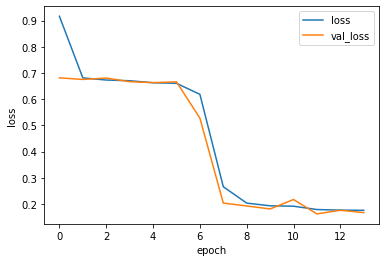

In [61]:
plt.plot(results.history['loss'], label = 'loss')
plt.plot(results.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output.png', dpi=300)

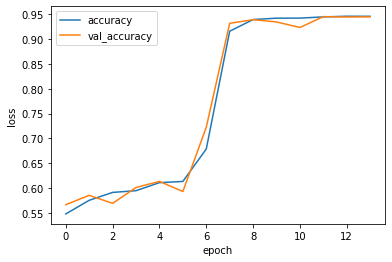

In [62]:
plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output2.png', dpi=300)

### epoch 14 기준 val_loss: 0.1672 - val_accuracy: 0.9450. 
* train 데이터와 test 데이터 정확도 손실 추이를 비교하여 큰 차이가 없음

### scikit-learn metrics를 활용한 모델 평가

In [63]:
model.evaluate_generator(test_img_gen)

C:\Users\user\AppData\Local\Temp/ipykernel_3504/2315898446.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_img_gen)


[0.16058245301246643, 0.9442307949066162]

In [64]:
model.metrics_names

['loss', 'accuracy']

### 모델을 통하여 테스트용으로 생성된 이미지에 대한 예측 수행

In [65]:
prediction = model.predict(test_img_gen)

163/163 [==============================] - 17s 101ms/step


In [75]:
prediction # 각 이미지에 대한 예측 정확도 확률

array([[6.53875060e-03],
       [1.08483575e-04],
       [6.62699995e-06],
       ...,
       [9.72804606e-01],
       [9.76307392e-01],
       [9.56505120e-01]], dtype=float32)

In [71]:
len(prediction)

2600

### 0 ~ 1 사이를 오가는 prediction threshold 는 정밀도와 재현율, F1 스코어 및 P-R 곡선 AUC 영역을 구하는 데 적용
* 감염 판정율을 내릴수록 재현율은 오르고 정밀도가 내려가며, 그 반대의 경우 정밀도가 내려가고 재현율이 내려간다. (trade-off)
* 감염을 분류해 내는 목적의 평가 특성상 실제 오염된 세포를 탐지하는 재현율이 중요할 수 있으나, 상황에 따라 달라질 수 있음

In [84]:
predictions = prediction > 0.5

In [85]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [88]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [80]:
predictions = prediction > 0.3

In [81]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1300
           1       0.91      0.98      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [82]:
predictions = prediction > 0.7

In [83]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.95      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [89]:
confusion_matrix(test_img_gen.classes, predictions) # 0.5 threshhold

array([[1210,   90],
       [  47, 1253]], dtype=int64)

#### 옳게 분류한 것은 2463개, 틀리게 분류한 것은 137개